<a href="https://colab.research.google.com/github/AbhiAadi/Optimizing-AC-energy-requirement/blob/main/DEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Data = pd.read_excel('Warm-humid-building-data.xlsx')
Data.head()

,S.No.,Date and time,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2024-02-01 09:00:00,269.9375,24.80,90.50,193189.0,14366.48,46680.6,-22115.20,64837.04
3,2.0,2024-02-01 10:00:00,451.0000,26.40,82.75,208709.9,34892.06,0.0,71372.86,18735.79
4,3.0,2024-02-01 11:00:00,257.5000,27.75,72.75,204338.6,30993.46,0.0,79076.78,10746.26


In [5]:
Data = Data.drop(0 , axis = 0)

In [6]:
Data = Data.drop(1 , axis = 0)

In [7]:
Data.head()

,S.No.,Date and time,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater
2,1.0,2024-02-01 09:00:00,269.9375,24.8000,90.500,193189.0,14366.48,46680.6,-22115.20,64837.04
3,2.0,2024-02-01 10:00:00,451.0000,26.4000,82.750,208709.9,34892.06,0.0,71372.86,18735.79
4,3.0,2024-02-01 11:00:00,257.5000,27.7500,72.750,204338.6,30993.46,0.0,79076.78,10746.26
5,4.0,2024-02-01 12:00:00,241.8750,28.5125,64.000,189399.4,21920.07,0.0,101663.50,-12261.10
6,5.0,2024-02-01 13:00:00,179.9375,28.6375,59.125,106161.8,29668.82,0.0,80126.27,9276.15


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 2 to 2601
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   S.No.                                       2600 non-null   float64       
 1   Date and time                               2600 non-null   datetime64[ns]
 2   Radiative intensity                         2600 non-null   float64       
 3   T_air                                       2600 non-null   float64       
 4   RH_air                                      2600 non-null   float64       
 5   DOAS VC chiller supplied cooling energy     2600 non-null   float64       
 6   Radiant VA chiller supplied cooling energy  2600 non-null   float64       
 7   Heating energy by gas boiler                2600 non-null   float64       
 8   Heating energy by solar collector           2600 non-null   float64       
 9   Heating 

In [9]:
Data = Data.drop(['Date and time'], axis = 1)
# Data = Data[Data['Heating energy by auxiliary heater']>0]

In [10]:
Data

,S.No.,Radiative intensity,T_air,RH_air,DOAS VC chiller supplied cooling energy,Radiant VA chiller supplied cooling energy,Heating energy by gas boiler,Heating energy by solar collector,Heating energy by auxiliary heater
2,1.0,269.9375,24.8000,90.500,193189.00,14366.480,46680.60,-22115.20,64837.040
3,2.0,451.0000,26.4000,82.750,208709.90,34892.060,0.00,71372.86,18735.790
4,3.0,257.5000,27.7500,72.750,204338.60,30993.460,0.00,79076.78,10746.260
5,4.0,241.8750,28.5125,64.000,189399.40,21920.070,0.00,101663.50,-12261.100
6,5.0,179.9375,28.6375,59.125,106161.80,29668.820,0.00,80126.27,9276.150
...,...,...,...,...,...,...,...,...,...
2597,2596.0,228.1875,28.5875,59.250,175259.40,27588.770,0.00,87765.03,4465.102
2598,2597.0,130.8750,27.9625,61.875,172859.10,17531.660,11190.61,27514.84,50696.970
2599,2598.0,50.9375,27.2625,65.500,171863.10,5750.690,95844.07,-37486.20,31044.520
2600,2599.0,103.1875,26.6250,70.125,174849.90,3321.207,117616.60,-51861.10,23646.920


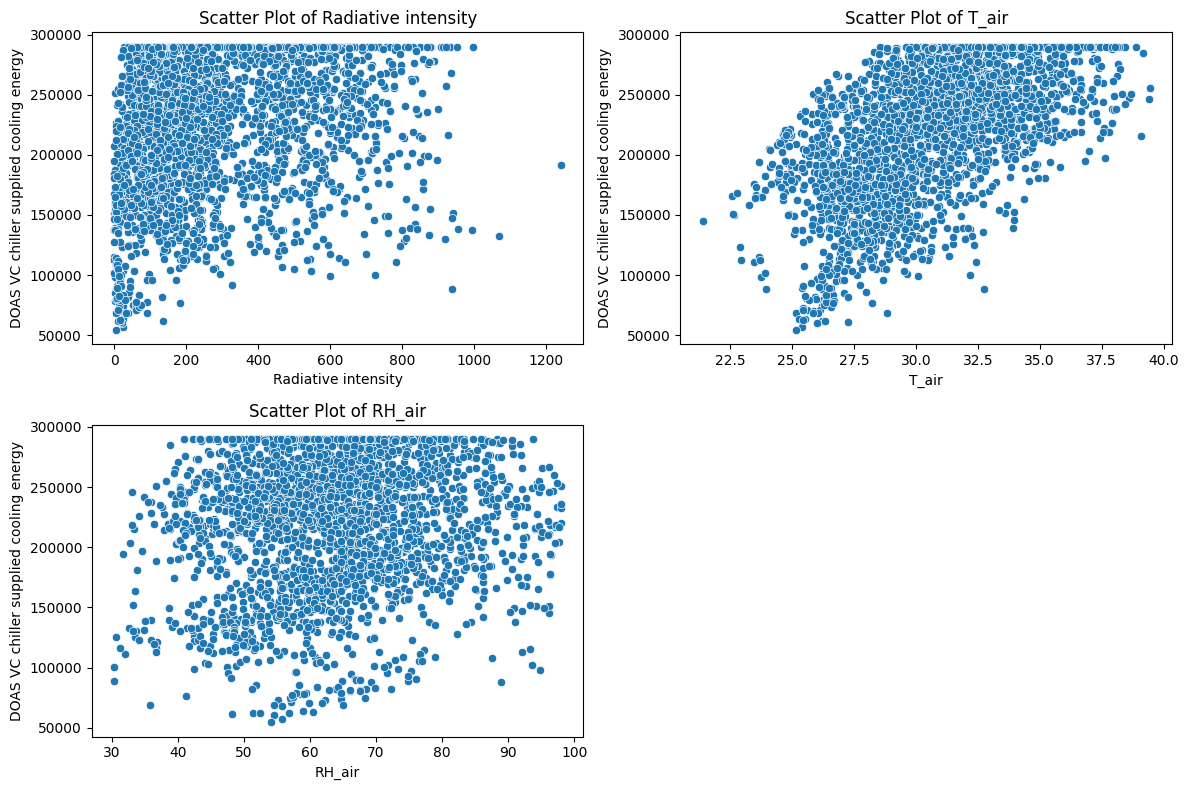

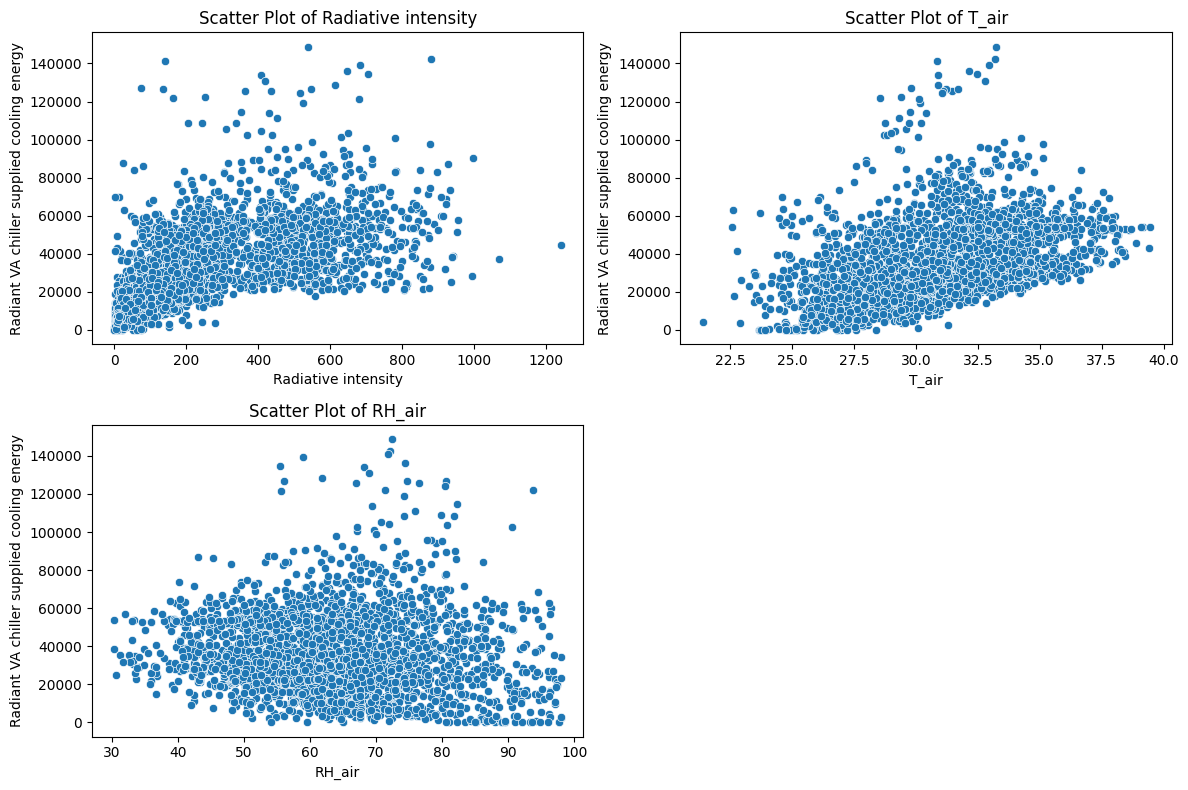

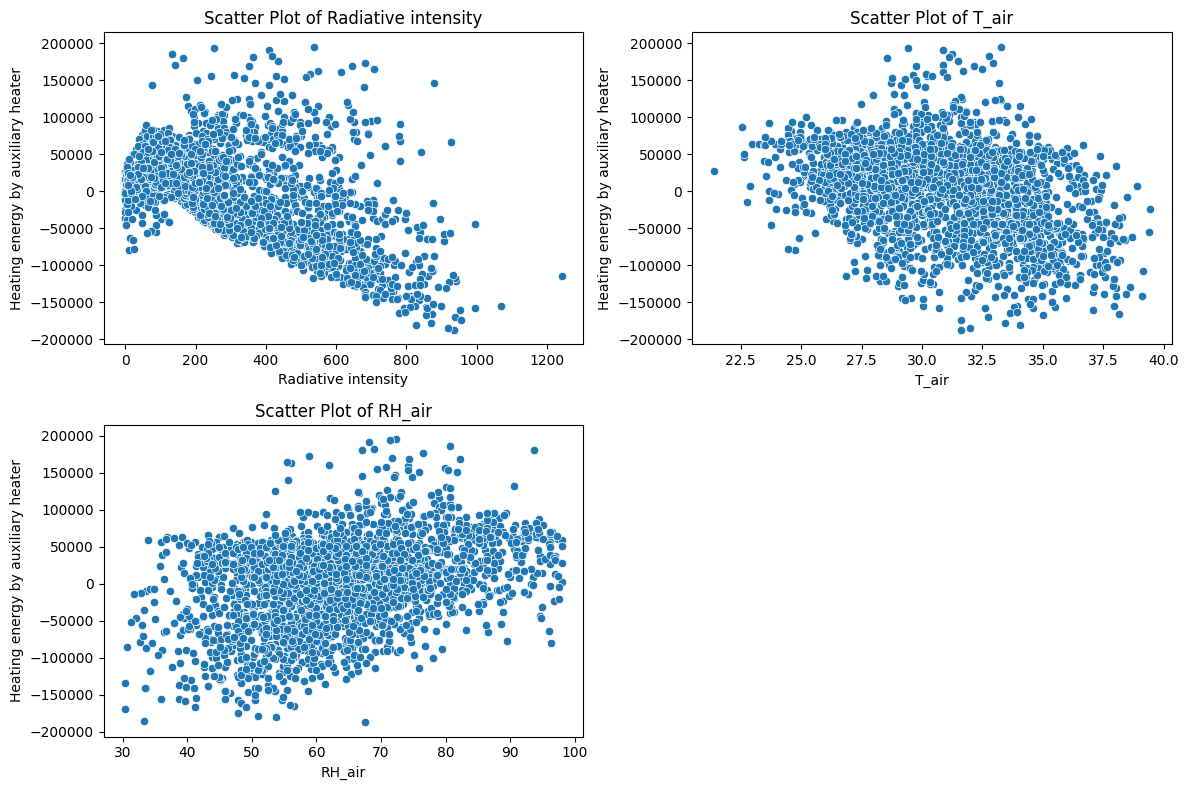

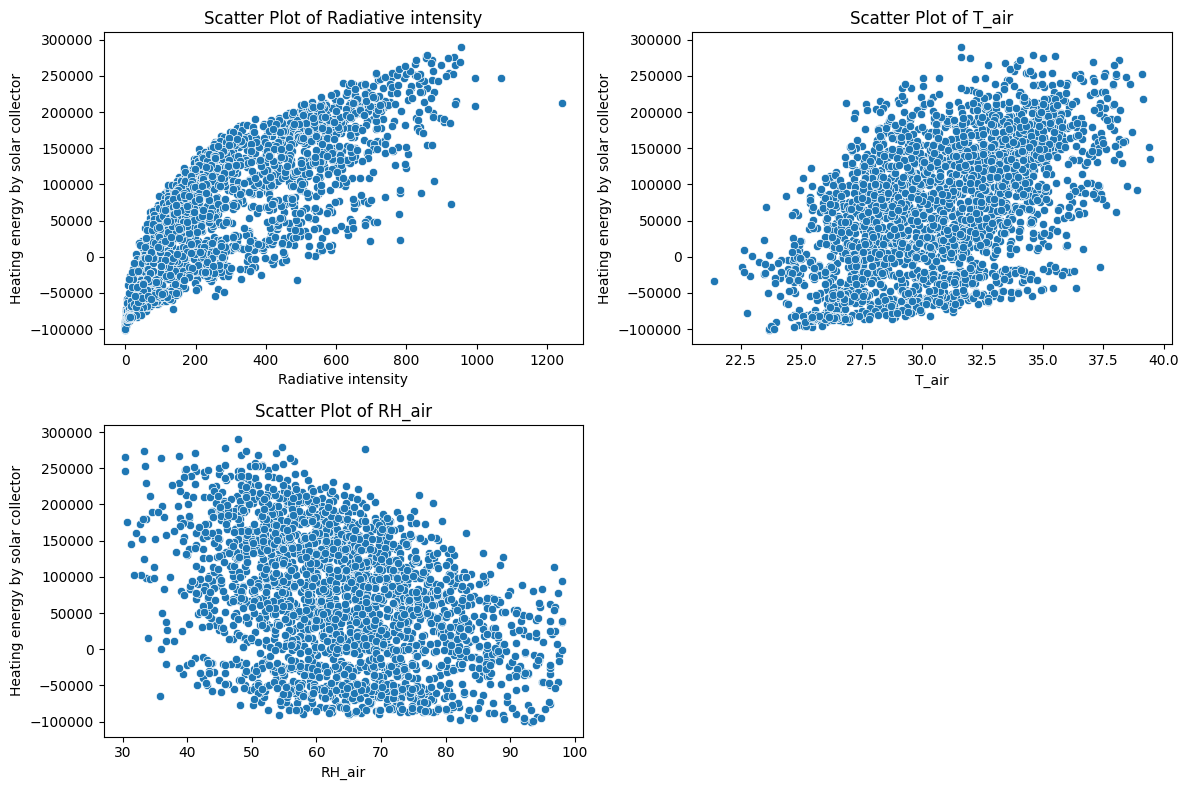

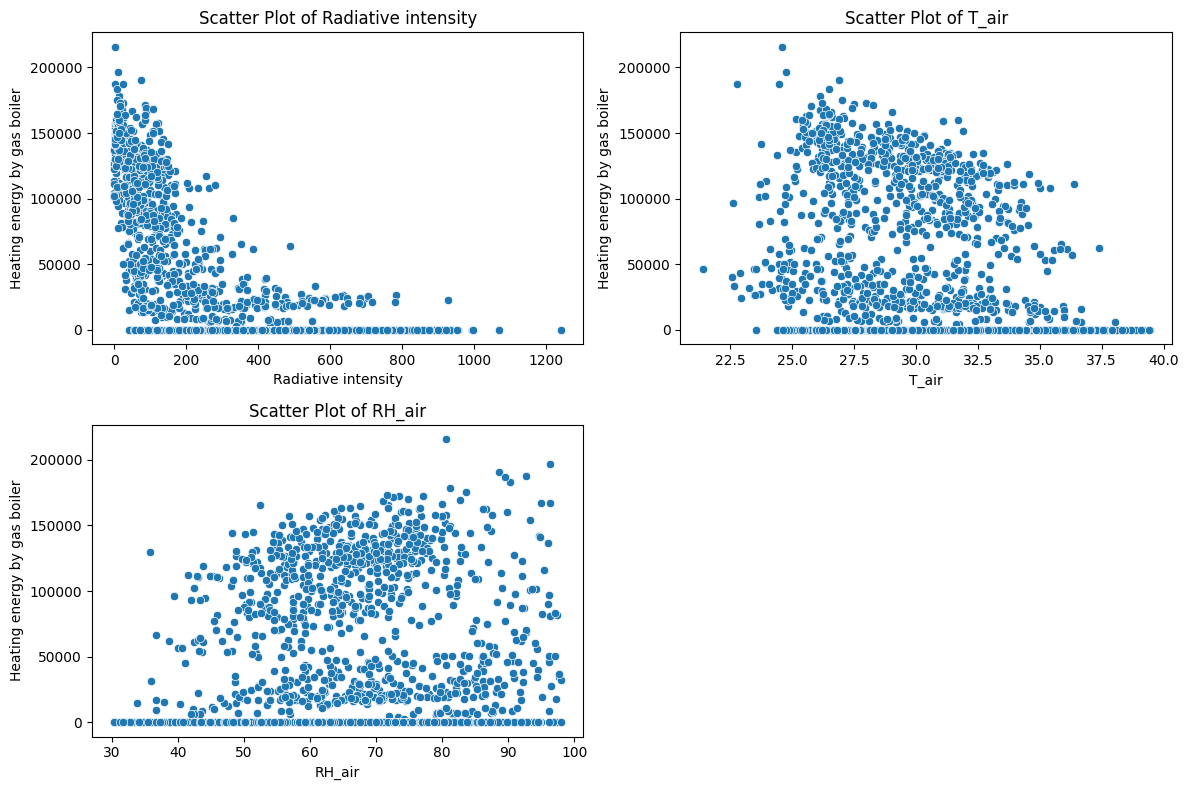

In [17]:
# Plot scatter plots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='DOAS VC chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Radiant VA chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by auxiliary heater', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by solar collector', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[1:4]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by gas boiler', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

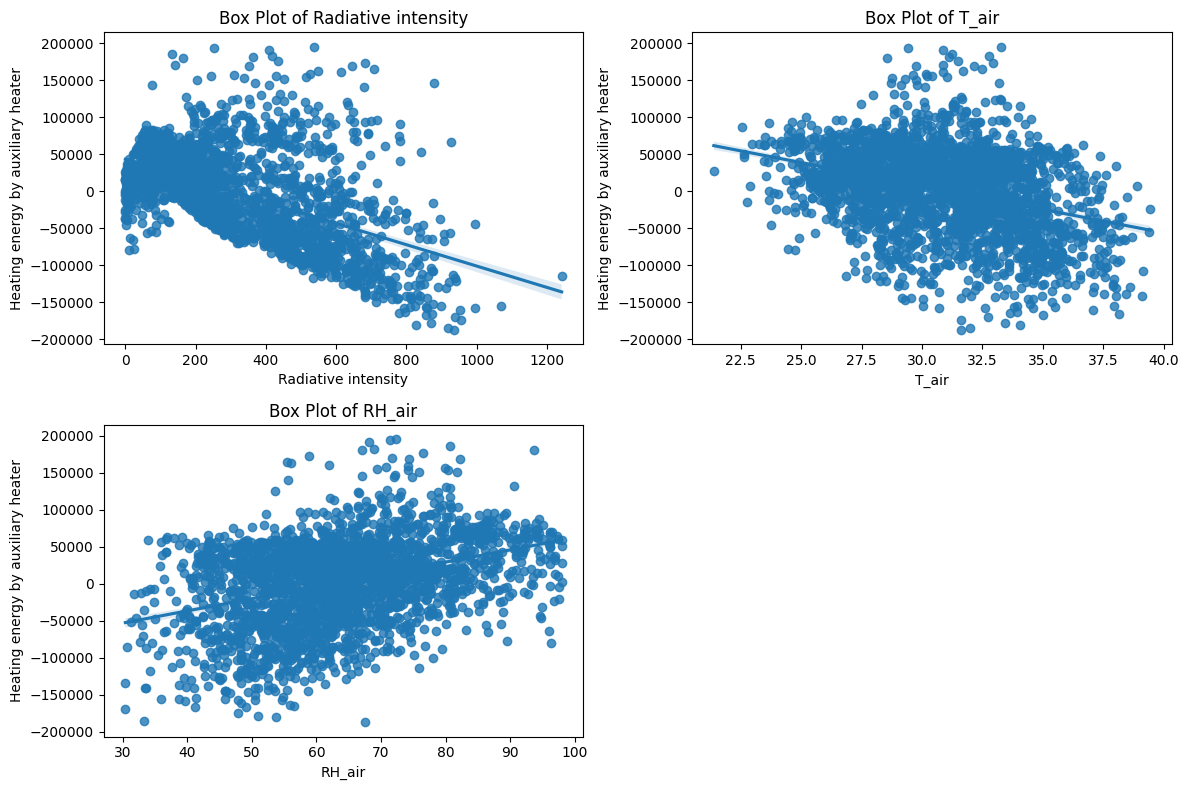

In [12]:
# Plot box plots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[1:-1]):
    plt.subplot(2, 2, i + 1)
    sns.regplot(y='Heating energy by auxiliary heater', x=feature, data=Data)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

Outliers in Radiative intensity:
       S.No.  Radiative intensity    T_air  RH_air  \
83      82.0            1241.7500  26.8625  75.875   
84      83.0             942.0625  28.2625  54.250   
144    143.0            1069.6880  30.0375  41.375   
306    305.0             955.3750  31.6000  47.875   
384    383.0             995.2500  30.7000  39.625   
853    852.0             996.5000  35.1250  59.250   
1225  1224.0             953.3750  37.0625  48.250   

      DOAS VC chiller supplied cooling energy  \
83                                   191825.1   
84                                   151632.9   
144                                  132611.4   
306                                  137997.9   
384                                  137217.8   
853                                  290021.9   
1225                                 290021.9   

      Radiant VA chiller supplied cooling energy  \
83                                      44726.93   
84                                   

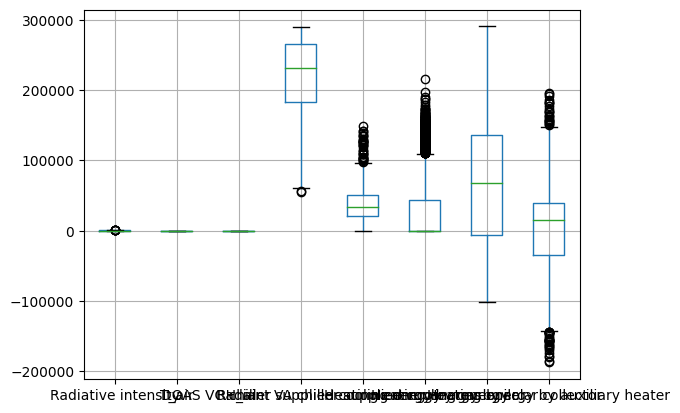

In [14]:
# Function to detect outliers using IQR
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Specify the columns for which you want to detect outliers
columns_to_check = ['Radiative intensity',	'T_air',	'RH_air',	'DOAS VC chiller supplied cooling energy',	'Radiant VA chiller supplied cooling energy',	'Heating energy by gas boiler',	'Heating energy by solar collector', 'Heating energy by auxiliary heater']

# Detect outliers for each column
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = detect_outliers(Data[column])

# Display outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(Data[outliers])

# You can also visualize the outliers using box plots
Data.boxplot(column=columns_to_check)
plt.show()


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers , regularizers

model = models.Sequential()

# Input layer
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.01), input_shape=(3,)))

# Hidden layers
model.add(layers.Dense(32, activation='relu' , kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.Dropout(0.2))  # Add dropout for regularization
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)))

# Output layer
model.add(layers.Dense(5, activation='linear' , kernel_regularizer=regularizers.l1(0.01)))


# Display the model summary
model.summary()


# import tensorflow as tf
# from tensorflow.keras import layers, models, initializers, regularizers

# # Define the architecture of the deep neural network
# model = models.Sequential()

# # First layer with 15 hidden units
# model.add(layers.Dense(15, activation='relu', kernel_initializer=initializers.GlorotUniform(), kernel_regularizer=regularizers.l1(0.01), input_shape=(3,)))

# # Layers 2 to 8 with 14 hidden units each
# for _ in range(7):
#     model.add(layers.Dense(14, activation='relu', kernel_initializer=initializers.GlorotUniform()))

# # Layers 9 to 17 with 8 hidden units each
# for _ in range(9):
#     model.add(layers.Dense(8, activation='relu', kernel_initializer=initializers.GlorotUniform()))

# # Layers 18 to 21 with 5 hidden units each
# for _ in range(4):
#     model.add(layers.Dense(5, activation='relu', kernel_initializer=initializers.GlorotUniform()))

# # Output layer with a single regression unit and ReLU activation
# model.add(layers.Dense(1, activation='linear'))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 5)                 85        
                                                                 
Total params: 2949 (11.52 KB)
Trainable params: 2949 (11.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
X = Data.iloc[:,1:4]
y = Data.iloc[:,-5:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and validation data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
y_train_normalized = scaler.fit_transform(y_train)
y_test_normalized = scaler.transform(y_test)
# Now, X_train_normalized and X_val_normalized contain the normalized data


In [36]:
# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mse' , )

# Train the model
history = model.fit(X_train_normalized, y_train_normalized, epochs=50, batch_size=42, validation_data=(X_test_normalized, y_test_normalized), verbose =1)

test_loss = model.evaluate(X_test_normalized, y_test_normalized)
print(f"Test Loss: {test_loss}")

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 0.1508 - val_loss: 0.1003
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1075 - val_loss: 0.1164
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1068 - val_loss: 0.0992
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1072 - val_loss: 0.0985
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1065 - val_loss: 0.1133
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1077 - val_loss: 0.1090
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1070 - val_loss: 0.0899
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1070 - val_loss: 0.1095
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1063 - val_loss: 0.1039
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1075 - val_loss: 0.1113
Epoch 11/50
50/50 [

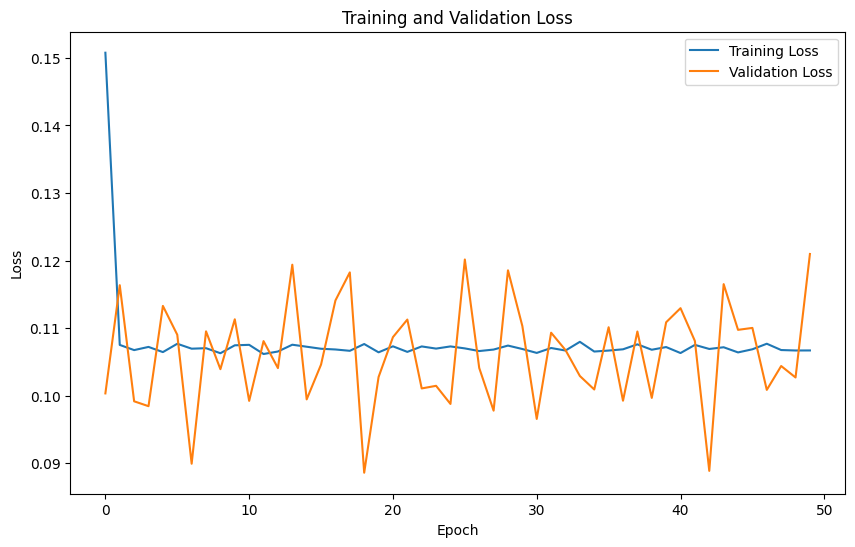

In [37]:
# Plot training loss and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

17/17 [==============================] - 0s 4ms/step


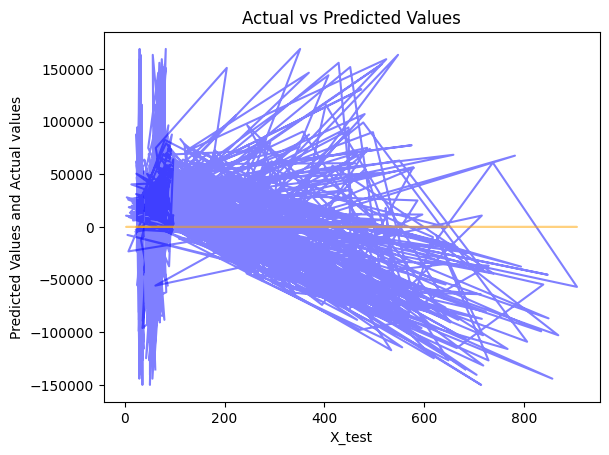

In [48]:
y_pred = model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.plot(X_test, y_test, color='blue', alpha=0.5)
plt.plot(X_test, y_pred, color='orange', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('X_test')
plt.ylabel('Predicted Values and Actual values')
plt.show()